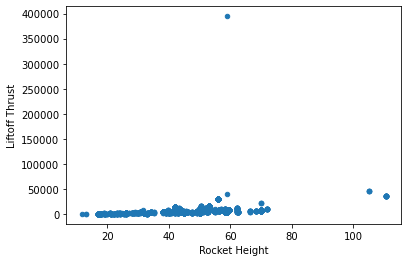

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def format_number(data, strippable):
    for string in strippable:
        data = data.str.replace(string, '')
    data = pd.to_numeric(data)
    return data

stat_list=['Rocket', 'Mission', 'Org', 'Outcome', 'Location', 'Time', 'Price',
           'Status', 'Liftoff Thrust', 'Rocket Height', 'Stages', 'Strap-ons']

df = pd.read_csv('launches.csv', header=0, names=stat_list)
df['Price'] = format_number(df['Price'], ['$', ' million', ','])
df['Liftoff Thrust'] = format_number(df['Liftoff Thrust'], [' kN', ','])
df['Rocket Height'] = format_number(df['Rocket Height'], [' m'])

launched = df.dropna(subset=['Outcome'])
launched['Time'] = pd.to_datetime(launched['Time'], infer_datetime_format=True)


launched.plot.scatter(x='Rocket Height', y='Liftoff Thrust')
plt.show()